Design and training a basic neural network on the FashionMNIST dataset



In [ ]:
# import the necessary libraries
import math
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# displays output inline
%matplotlib inline

# Data Preprocessing

In [ ]:
# use FashionMNIST dataset published by Zalando Research
fashion_mnist = keras.datasets.fashion_mnist
(in_train, out_train), (in_valid, out_valid) = fashion_mnist.load_data()

In [ ]:
# 60,000 training images, each image is a grayscale image with size 28x28 pixels
# 10,000 testing images, each image is a grayscale image with size 28x28 pixels
# 10 total categories and each label is assigned a number between 0 and 9
in_train.shape, in_valid.shape, np.unique(out_train)

((60000, 28, 28),
 (10000, 28, 28),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [ ]:
# scale the values between 0 and 1 for both training and validation sets
in_train = in_train / 255.0
in_valid = in_valid / 255.0

In [ ]:
# define ten categories from 0 to 9
class_names = {index:cn for index, cn in enumerate(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])}

# Training Set

How many rows of training images would you like to review4


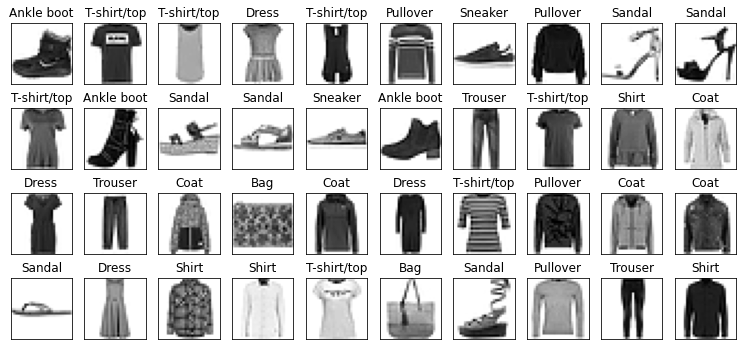

In [ ]:
def plot(images, labels, predictions=None):
    # create a grid with 10 columns
    n_cols = min(10, len(images))
    n_rows = math.ceil(len(images) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols + 3, n_rows + 2))
    if predictions is None:
        predictions = [None] * len(labels)
    for index, (x, y_true, y_pred) in enumerate(zip(images, labels, predictions)):
        ax = axes.flat[index]
        ax.imshow(x, cmap=plt.cm.binary)
        ax.set_title(class_names[y_true])
        if y_pred is not None:
            ax.set_xlabel(class_names[y_pred])
        ax.set_xticks([])
        ax.set_yticks([])

# plot first 20 images
i = int(input("How many rows of training images would you like to review"))
plot(in_train[:i*10], out_train[:i*10])   

# Models in Keras

In [ ]:
#Model 1
model = keras.Sequential(layers=[
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(in_train, out_train, batch_size=60, epochs=20, validation_split=0.2)

Epoch 1/20
800/800 [==============================] - 2s 2ms/step - loss: 0.5431 - accuracy: 0.8127 - val_loss: 0.4360 - val_accuracy: 0.8473
Epoch 2/20
800/800 [==============================] - 2s 2ms/step - loss: 0.4052 - accuracy: 0.8559 - val_loss: 0.4157 - val_accuracy: 0.8518
Epoch 3/20
800/800 [==============================] - 2s 2ms/step - loss: 0.3634 - accuracy: 0.8691 - val_loss: 0.3722 - val_accuracy: 0.8665
Epoch 4/20
800/800 [==============================] - 2s 2ms/step - loss: 0.3383 - accuracy: 0.8776 - val_loss: 0.3528 - val_accuracy: 0.8744
Epoch 5/20
800/800 [==============================] - 2s 2ms/step - loss: 0.3162 - accuracy: 0.8852 - val_loss: 0.3542 - val_accuracy: 0.8731
Epoch 6/20
800/800 [==============================] - 2s 2ms/step - loss: 0.3008 - accuracy: 0.8899 - val_loss: 0.3318 - val_accuracy: 0.8797
Epoch 7/20
800/800 [==============================] - 2s 2ms/step - loss: 0.2845 - accuracy: 0.8950 - val_loss: 0.3345 - val_accuracy: 0.8798
Epoch 

In [ ]:
loss, accuracy = model.evaluate(in_valid, out_valid)

313/313 [==============================] - 1s 2ms/step - loss: 0.3899 - accuracy: 0.8766


In [ ]:
# Model 2 (extra layer)
model2 = keras.Sequential(layers=[
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model2.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model2.fit(in_train, out_train, batch_size=60, epochs=20, validation_split=0.2)

Epoch 1/20
800/800 [==============================] - 2s 3ms/step - loss: 0.5156 - accuracy: 0.8175 - val_loss: 0.3939 - val_accuracy: 0.8581
Epoch 2/20
800/800 [==============================] - 2s 3ms/step - loss: 0.3804 - accuracy: 0.8629 - val_loss: 0.3901 - val_accuracy: 0.8591
Epoch 3/20
800/800 [==============================] - 2s 3ms/step - loss: 0.3396 - accuracy: 0.8748 - val_loss: 0.3483 - val_accuracy: 0.8738
Epoch 4/20
800/800 [==============================] - 2s 2ms/step - loss: 0.3136 - accuracy: 0.8842 - val_loss: 0.3407 - val_accuracy: 0.8734
Epoch 5/20
800/800 [==============================] - 2s 3ms/step - loss: 0.2960 - accuracy: 0.8901 - val_loss: 0.3280 - val_accuracy: 0.8826
Epoch 6/20
800/800 [==============================] - 2s 2ms/step - loss: 0.2812 - accuracy: 0.8938 - val_loss: 0.3398 - val_accuracy: 0.8778
Epoch 7/20
800/800 [==============================] - 2s 2ms/step - loss: 0.2689 - accuracy: 0.8994 - val_loss: 0.3148 - val_accuracy: 0.8866
Epoch 

In [ ]:
loss2, accuracy2 = model2.evaluate(in_valid, out_valid)

313/313 [==============================] - 1s 1ms/step - loss: 0.3783 - accuracy: 0.8871


In [ ]:
# Model 3(Changing activation function)
model3 = keras.Sequential(layers=[
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="sigmoid"),
    keras.layers.Dense(128, activation="sigmoid"),
    keras.layers.Dense(10, activation="softmax")
])
model3.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model3.fit(in_train, out_train, batch_size=60, epochs=20, validation_split=0.2)

Epoch 1/20
800/800 [==============================] - 2s 3ms/step - loss: 0.7071 - accuracy: 0.7613 - val_loss: 0.4599 - val_accuracy: 0.8381
Epoch 2/20
800/800 [==============================] - 2s 3ms/step - loss: 0.4209 - accuracy: 0.8486 - val_loss: 0.4048 - val_accuracy: 0.8547
Epoch 3/20
800/800 [==============================] - 2s 3ms/step - loss: 0.3792 - accuracy: 0.8628 - val_loss: 0.3724 - val_accuracy: 0.8668
Epoch 4/20
800/800 [==============================] - 2s 3ms/step - loss: 0.3521 - accuracy: 0.8723 - val_loss: 0.3762 - val_accuracy: 0.8614
Epoch 5/20
800/800 [==============================] - 2s 3ms/step - loss: 0.3359 - accuracy: 0.8783 - val_loss: 0.3482 - val_accuracy: 0.8704
Epoch 6/20
800/800 [==============================] - 2s 3ms/step - loss: 0.3194 - accuracy: 0.8835 - val_loss: 0.3441 - val_accuracy: 0.8763
Epoch 7/20
800/800 [==============================] - 2s 3ms/step - loss: 0.3054 - accuracy: 0.8889 - val_loss: 0.3273 - val_accuracy: 0.8809
Epoch 

In [ ]:
loss3, accuracy3 = model3.evaluate(in_valid, out_valid)

313/313 [==============================] - 1s 2ms/step - loss: 0.3448 - accuracy: 0.8846


In [ ]:
#Model 4 (Changing batch size)
model4 = keras.Sequential(layers=[
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="sigmoid"),
    keras.layers.Dense(128, activation="sigmoid"),
    keras.layers.Dense(10, activation="softmax")
])
model4.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model4.fit(in_train, out_train, batch_size=100, epochs=20, validation_split=0.2)

Epoch 1/20
480/480 [==============================] - 2s 3ms/step - loss: 0.8001 - accuracy: 0.7429 - val_loss: 0.4813 - val_accuracy: 0.8294
Epoch 2/20
480/480 [==============================] - 2s 3ms/step - loss: 0.4388 - accuracy: 0.8425 - val_loss: 0.4198 - val_accuracy: 0.8509
Epoch 3/20
480/480 [==============================] - 2s 3ms/step - loss: 0.3897 - accuracy: 0.8599 - val_loss: 0.3790 - val_accuracy: 0.8648
Epoch 4/20
480/480 [==============================] - 2s 3ms/step - loss: 0.3621 - accuracy: 0.8699 - val_loss: 0.3623 - val_accuracy: 0.8679
Epoch 5/20
480/480 [==============================] - 2s 3ms/step - loss: 0.3426 - accuracy: 0.8764 - val_loss: 0.3523 - val_accuracy: 0.8733
Epoch 6/20
480/480 [==============================] - 2s 3ms/step - loss: 0.3279 - accuracy: 0.8812 - val_loss: 0.3441 - val_accuracy: 0.8748
Epoch 7/20
480/480 [==============================] - 2s 4ms/step - loss: 0.3132 - accuracy: 0.8862 - val_loss: 0.3304 - val_accuracy: 0.8771
Epoch 

In [ ]:
loss4, accuracy4 = model4.evaluate(in_valid, out_valid)

313/313 [==============================] - 1s 2ms/step - loss: 0.3473 - accuracy: 0.8787


In [ ]:
# Model 5 (Changing epochs)
model5 = keras.Sequential(layers=[
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="sigmoid"),
    keras.layers.Dense(128, activation="sigmoid"),
    keras.layers.Dense(10, activation="softmax")
])
model5.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model5.fit(in_train, out_train, batch_size=100, epochs=30, validation_split=0.2)

Epoch 1/30
480/480 [==============================] - 2s 3ms/step - loss: 0.7926 - accuracy: 0.7436 - val_loss: 0.4815 - val_accuracy: 0.8290
Epoch 2/30
480/480 [==============================] - 2s 3ms/step - loss: 0.4392 - accuracy: 0.8419 - val_loss: 0.4187 - val_accuracy: 0.8497
Epoch 3/30
480/480 [==============================] - 2s 3ms/step - loss: 0.3912 - accuracy: 0.8598 - val_loss: 0.3850 - val_accuracy: 0.8602
Epoch 4/30
480/480 [==============================] - 2s 4ms/step - loss: 0.3656 - accuracy: 0.8692 - val_loss: 0.3675 - val_accuracy: 0.8666
Epoch 5/30
480/480 [==============================] - 2s 3ms/step - loss: 0.3469 - accuracy: 0.8754 - val_loss: 0.3790 - val_accuracy: 0.8615
Epoch 6/30
480/480 [==============================] - 1s 3ms/step - loss: 0.3295 - accuracy: 0.8806 - val_loss: 0.3518 - val_accuracy: 0.8726
Epoch 7/30
480/480 [==============================] - 2s 3ms/step - loss: 0.3166 - accuracy: 0.8860 - val_loss: 0.3390 - val_accuracy: 0.8780
Epoch 

In [ ]:
loss5, accuracy5 = model5.evaluate(in_valid, out_valid)

313/313 [==============================] - 1s 1ms/step - loss: 0.3712 - accuracy: 0.8818


In [ ]:
# Model 6 (Changing validation split)
model6 = keras.Sequential(layers=[
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="sigmoid"),
    keras.layers.Dense(128, activation="sigmoid"),
    keras.layers.Dense(10, activation="softmax")
])
model6.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model6.fit(in_train, out_train, batch_size=100, epochs=30, validation_split=0.3)

Epoch 1/30
420/420 [==============================] - 2s 4ms/step - loss: 0.8453 - accuracy: 0.7239 - val_loss: 0.5134 - val_accuracy: 0.8229
Epoch 2/30
420/420 [==============================] - 1s 3ms/step - loss: 0.4568 - accuracy: 0.8371 - val_loss: 0.4296 - val_accuracy: 0.8413
Epoch 3/30
420/420 [==============================] - 1s 3ms/step - loss: 0.4023 - accuracy: 0.8544 - val_loss: 0.3950 - val_accuracy: 0.8563
Epoch 4/30
420/420 [==============================] - 1s 3ms/step - loss: 0.3746 - accuracy: 0.8647 - val_loss: 0.3819 - val_accuracy: 0.8612
Epoch 5/30
420/420 [==============================] - 2s 4ms/step - loss: 0.3552 - accuracy: 0.8720 - val_loss: 0.3604 - val_accuracy: 0.8679
Epoch 6/30
420/420 [==============================] - 1s 3ms/step - loss: 0.3390 - accuracy: 0.8775 - val_loss: 0.3523 - val_accuracy: 0.8732
Epoch 7/30
420/420 [==============================] - 1s 4ms/step - loss: 0.3271 - accuracy: 0.8810 - val_loss: 0.3521 - val_accuracy: 0.8725
Epoch 

In [ ]:
loss6, accuracy6 = model6.evaluate(in_valid, out_valid)

313/313 [==============================] - 1s 1ms/step - loss: 0.3577 - accuracy: 0.8810


In [ ]:
# Reporting all model accuracies
import pandas as pd
report = pd.DataFrame({"Model":["Model1","Model2","Model3","Model4","Model5","Model6"], "Accuracy Score":[accuracy,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6], "Loss":[loss,loss2,loss3,loss4,loss5,loss6]})
report

,Model,Accuracy Score,Loss
0,Model1,0.8766,0.389889
1,Model2,0.8871,0.378284
2,Model3,0.8846,0.344834
3,Model4,0.8787,0.347254
4,Model5,0.8818,0.371158
5,Model6,0.8810,0.357739


In [ ]:
#Maximum accuracy to determine the best model
max_accuracy = max(report["Accuracy Score"])
Best_Model = report["Model"][report["Accuracy Score"] == max_accuracy]
#Best Model
print("Best Model")
report[report["Accuracy Score"]== max_accuracy]

Best Model


,Model,Accuracy Score,Loss
1,Model2,0.8871,0.378284


In [ ]:
#  Other Metrics on Model 2 (extra layer)
model2 = keras.Sequential(layers=[
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model2.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy","categorical_accuracy"])
model2.fit(in_train, out_train, batch_size=60, epochs=20, validation_split=0.2)

Epoch 1/20
800/800 [==============================] - 3s 3ms/step - loss: 0.5160 - accuracy: 0.8199 - categorical_accuracy: 0.1043 - val_loss: 0.4128 - val_accuracy: 0.8527 - val_categorical_accuracy: 0.1177
Epoch 2/20
800/800 [==============================] - 2s 3ms/step - loss: 0.3790 - accuracy: 0.8617 - categorical_accuracy: 0.1019 - val_loss: 0.3605 - val_accuracy: 0.8712 - val_categorical_accuracy: 0.1005
Epoch 3/20
800/800 [==============================] - 2s 3ms/step - loss: 0.3414 - accuracy: 0.8742 - categorical_accuracy: 0.1010 - val_loss: 0.3479 - val_accuracy: 0.8755 - val_categorical_accuracy: 0.1173
Epoch 4/20
800/800 [==============================] - 2s 3ms/step - loss: 0.3123 - accuracy: 0.8839 - categorical_accuracy: 0.1017 - val_loss: 0.3481 - val_accuracy: 0.8768 - val_categorical_accuracy: 0.0980
Epoch 5/20
800/800 [==============================] - 2s 3ms/step - loss: 0.2942 - accuracy: 0.8910 - categorical_accuracy: 0.1012 - val_loss: 0.3305 - val_accuracy: 0.

# Validation Set

In [ ]:
# predict the validation set
probs = model2.predict(in_valid)
print(probs.argmax(axis=1))
# another way to do the same thing
preds = model2.predict(in_valid).argsort()[:,-1]
print(preds)

[9 2 1 ... 8 1 5]
[9 2 1 ... 8 1 5]


How many rows do you want to see4


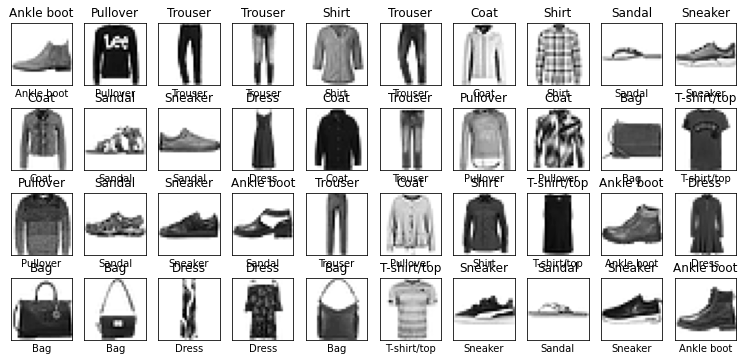

In [ ]:
# plot 20 random data
#rand_idxs = np.random.permutation(len(in_valid))[:20]
i = int(input("How many rows do you want to see"))
plot(in_valid[:i*10], out_valid[:i*10], preds[:i*10])

# Application

In [ ]:
from ipywidgets import interact, widgets
# Creating the slider to select the index of image from validation dataset
img_idx_slider = widgets.IntSlider(value=0, min=0, max=len(in_valid) - 1, description="Image index")
@interact(index=img_idx_slider)
def visualize_prediction(index=0):
    # Creating subplots
    fix, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(20, 5))
    ax1.imshow(in_valid[index], cmap=plt.cm.binary)
    ax1.set_title("label: %s" % class_names[out_valid[index]])
    ax1.set_xlabel("predict: %s" % class_names[preds[index]])
    ax2.bar(x=[class_names[index] for index in range(10)], height=probs[index]*100)
    # Creating barchart to report accuracy
    ax3.bar(x=["Model1","Model2","Model3","Model4","Model5","Model 6"],height=[accuracy,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6])
    # Setting the title
    ax3.set_title("Model Accuracy Scores")
    # Setting the x and y labels
    ax3.set_xlabel("Model")
    ax3.set_ylabel("Accuracy Score")

    plt.xticks(rotation=90)

interactive(children=(IntSlider(value=0, description='Image index', max=9999), Output()), _dom_classes=('widge…